<a href="https://colab.research.google.com/github/two-phaseflow/JAR513M/blob/main/Week2_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **JAR513 Week 2 - Group Assignment**

Welcome to the JAR513M Week 2 Group Assignment: “Global Resource Production and Data Analysis.” This notebook guides you through data wrangling, plotting, and fitting simple logistic (Hubbert-style) curves to historical production data. While this example focuses on an imaginary commodity (unobtanium) and countries, you will analyze real data for fossil fuels and uranium, compare production trends, and reflect on how geology, efficiency, and policy intersect with resource dynamics.

# An Introduction to Python



Python is a programming language that is widely used in science and engineering because it is:
*   Readable (the code looks a lot like English)
*   Flexible (used for data analysis, modeling, machine learning, web apps, etc.)
*   Open-source (free, with many libraries contributed by the scientific community)

In this notebook, we'll mostly use Python as a data analysis and plotting tool.



# Why import libraries?

Python by itself is powerful, but to do specialized tasks (like plotting graphs or handling data tables) we use libraries.
*   Think of libraries as "toolboxes" we can load into Python.
*   Each toolbox contains functions we can use without reinventing them.

For example:
*   `pandas` -> tools for handling data tables (like Excel in Python)
*   `numpy` -> numerical tools for arrays and math
*   `matplotlib` -> tools for making plots and figures
*   `scipy` -> scientific functions, like curve fitting


# Example

In [2]:
import pandas as pd # load the "pandas" toolbox, give it a short nickname 'pd'
import numpy as np # numerical tools
import matplotlib.pyplot as plt # plotting tools

Now, instead of writing everything from scratch, we can call these ready-made functions. For example, `np.sqrt(9)` will give the square root of 9.

# Reading in data with `pandas`

Now we are ready to read in our dataset. In Google Colab, files don’t automatically “live” inside the notebook; we first need to upload them to the session. On the left-hand panel, click the folder icon (“Files”), then the upload button, and choose your CSV file (e.g., `unobtanium_production_data.csv`). Once uploaded, Colab will store the file temporarily for this session. If you close and reopen the notebook later, you’ll need to upload it again. Next we’ll use `pandas` to read our dataset into a **DataFrame** (a table, like in Excel, but inside Python).

In [3]:
df = pd.read_csv("unobtanium_production_data.csv", skiprows=1)

*   `read_csv` is a function inside of the pandas library that reads a CSV (comma-seaparated values) file
*   `"unobtanium_production_data.csv"`is the file name
*   `skiprows=1` tells pandas to skip the very first row in the file, since that row contains background notes, not actual data. Note however, that background notes can be very important, and in this case inspection of our csv indicates that *production data is given in units of million tonnes*.

After loading, our data is stored in the variable `df`, which is a pandas DataFrame. To quickly check that the data imported correctly, we can take a quick look at the first five rows with:



In [4]:
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Zentopia,13,15,18,23,26,33,40,42,49,...,133,125,96,91,78,65,52,46,40,32
1,Fictonia,75,103,131,144,165,170,220,228,199,...,253,255,249,218,184,178,172,134,121,95
2,Imaginaria,12,10,12,11,10,11,11,11,10,...,142,149,148,149,167,196,203,211,222,241
3,Pseudoland,410,368,337,296,273,256,256,292,294,...,179,186,195,182,194,198,172,167,150,131
4,Mythshire,174,170,204,188,199,228,211,213,232,...,421,462,495,513,487,535,549,502,482,485


This command shows us the first 5 rows of the table, helping us check that the data imported correctly. Notice that the data is in *wide format*: each year is a separate column, each country a separate row.
For analysis and plotting, it's usually easier to work with long (or tidy) format, where each row is a single observation:
*   one column for the country
*   one column for the year
*   one column for the production value

We can reshape the data using the `melt` function:

In [6]:
df_long = df.melt(id_vars="Country", var_name="Year", value_name="Production")
df_long.head()

,Country,Year,Production
0,Zentopia,1970,13
1,Fictonia,1970,75
2,Imaginaria,1970,12
3,Pseudoland,1970,410
4,Mythshire,1970,174


Now the data is tidy, and each row corresponds to *Country-Year-Production*.

# Cleaning the data

Before we analyze or plot, we should make sure the data is in the correct format:

In [12]:
df_long["Year"] = df_long["Year"].astype(int)
df_long["Production"] = pd.to_numeric(df_long["Production"], errors="coerce")

*   `astype(int)` makes sure that the year is stored as an integer
*   `pd.to_numeric(..., errors="coerce")` ensures production is treated as a number. If anything can't be converted, it becomes `NaN` (missing data).



# Plotting country production

Now that our dataset is in tidy format, we can start exploring it with plots.
The following code will make a line plot for each country in our dataset:

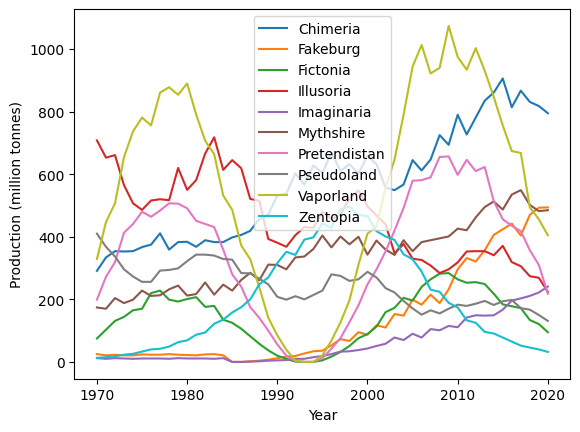

In [21]:
for country, subset in df_long.groupby("Country"):
    plt.plot(subset["Year"], subset["Production"], label=country)
plt.ylabel("Production (million tonnes)")
plt.xlabel("Year")
plt.legend()
plt.show()

What's happening here?
*   `df_long.groupby("Country")` splits the data into smaller tables, one for each country.
*   The `for` loop goes through each of those smaller tables, saving the country name in `country` and the corresponding rows in `subset`.
*   Inside the loop, `plt.plot(...)` draws a line of production vs. year for that country. The order of arguments is important: the `subset["Year"]` column is shown on the X-axis, and the `subset["Production"]` column shown on the Y-axis.
*   `plt.legend()` adds a key showing which line belong to which country.
*   Finally, `plt.show()` displays the figure.

This is your first look at a loop: instead of writing out one plot command per country, the loop automates it, repeating the same action for each group in the data.


# Find the top 5 producers in a chosen year

Let's identify the top five countries producing unobtanium for a specific year.

In `pandas`, we can chain operations together by connecting them with dots (`.`). Each step produces an output, and that output becomes the input for the next step.

In [14]:
year_choice = 2005 # change as you like

top5 = (df_long.query("Year == @year_choice")
        .nlargest(5, "Production")
        [["Country", "Production"]])

print(top5)

          Country  Production
359     Vaporland         944
358      Chimeria         645
355  Pretendistan         579
354     Mythshire         354
357     Illusoria         330


What's happening here?
*   First, we choose a year (`year_choice`). We will filter the dataset to keep only the rows for that year.
*   `df.query("Year == @year_choice")` filters the dataset to only rows from the chosen year. The part in quotation marks (`"Year == @year_choice"`) is called a string expression. The `@year_choice` part tells pandas to subtitute the value of the Python variable `year_choice`. Then, `"Year == 2005"` means "keep only the rows where the `Year` column is equal to 2005". The `==` is the "equals" operator in Python (A single `=` is used for assignment, so `==` checks equality).
*   From that filtered table, `.nlargest(5,"Production")` selects the 5 rows with the highest value in the `Production` column. This gives us the top 5 producers in that year.  
*   Finally, `["Country", "Production"]` selects only the two columns we care about.
* `print(top5)` writes out this table to the screen showing the top 5 producers for the chosen year.




# Compute cumulative production (per country)

In order to fit a Hubbert model to the production data, we need to calculate the cumulative production (the total amount of production when added up between years). We can compute it by grouping by country and taking a running sum.

First, we sort the data so that each country's years are in the right order:

In [17]:
df_long = df_long.sort_values(["Country", "Year"])


Then we make a new column in the table:

In [18]:
df_long["CumulativeProduction"] = df_long.groupby("Country")["Production"].cumsum()

What's happening here?
*   `groupby("Country")` tells Pandas to treat each country separately.
*   `["Production"]` selects the production values for each group.
*   `.cumsum()` adds up production year by year, making a running total.

So for each country, the cumulative column starts with the first year’s production, then adds the next year, then the next, and so on.

Finally, we can check the result:

In [19]:
df_long.head()

,Country,Year,Production,CumulativeProduction
8,Chimeria,1970,291,291
18,Chimeria,1971,334,625
28,Chimeria,1972,354,979
38,Chimeria,1973,353,1332
48,Chimeria,1974,354,1686


This shows us the first five rows, and we can now see a new column called `CumulativeProduction`.

We can also make a plot comparing cumulative vs. annual production for one country. Let's choose "Zentopia".

In [ ]:
country_choice = "Zentopia"  # change as needed
sub = df_long[df_long["Country"] == country_choice]

This filters the dataframe so `sub` only contains data for the chosen country. The following code will make 1 row and 2 columns of plots, side-by-side, with Production data on the left and Cumulative Production data on the right.

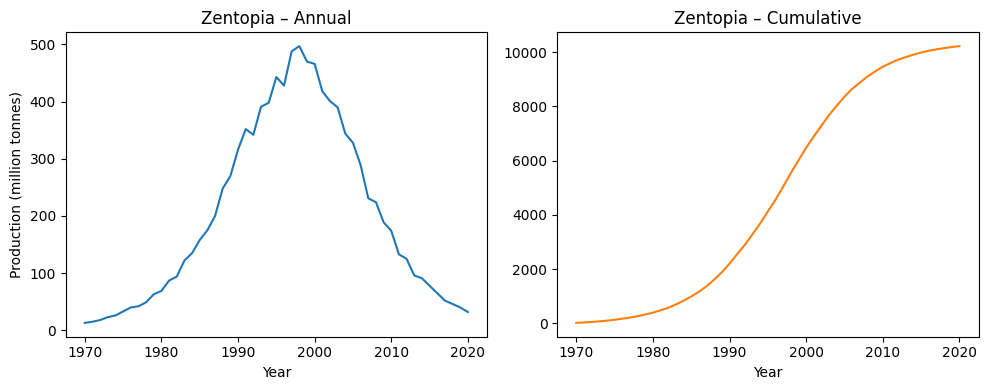

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True)
ax[0].plot(sub["Year"], sub["Production"])
ax[0].set_title(f"{country_choice} – Annual")
ax[0].set_ylabel("Production (million tonnes)")
ax[0].set_xlabel("Year")

ax[1].plot(sub["Year"], sub["CumulativeProduction"], color="tab:orange")
ax[1].set_title(f"{country_choice} – Cumulative")
ax[1].set_xlabel("Year")

plt.tight_layout()
plt.show()


What's happening here?
*   plt.subplots(1,2,...) means: make 1 row and 2 columns of plots. We also set the figure size (`figsize`).
*   This gives us two axes objects (`ax[0]` and `ax[1]`) stored inside a Python list-like structure.
*   That's why we use indexing (`ax[0]` for the first plot, `ax[1]` for the second).
*   On `ax[0]`, we plot annual production. We also set a figure title (`{country_choice}` substitutes the value of the `country_choice` variable set above into the string) , and x- and y-labels.
*   On `ax[1]`, we plot cumulative production, set a title, and an x-axis label.
*   `plt.tight_layout()` makes sure the two plots don't overlap and are displayed neatly.

# Define a Hubbert (logistic) model and fit it to the data

### The Hubbert Curve

Many natural resource production histories follow a bell-shaped curve, first popularized by geoscientist **M. King Hubbert** in the 1950s.  The basic idea is that resource production in a given region (or globally) tends to:

1. Increase rapidly during the early years, as new discoveries and extraction capacity grow.
2. Reach a peak when about half of the recoverable resource has been produced.
3. Decline as the resource becomes harder and more expensive to extract.

This “Hubbert curve” can be modeled mathematically using a logistic function expressed in terms of cumulative production:

$$
Q(t) = \frac{Q_{\infty}}{1 + e^{-k(t-t_0)}}
$$

- $Q(t)$: cumulative production at time $t$  
- $Q_{\infty}$: ultimately recoverable resource (URR)  
- $k$: growth rate constant  
- $t_0$: the year when production reaches half of $Q_{\infty}$ (the midpoint of the curve)

This is a logistic “S-shaped” curve: slow growth at first, rapid growth in the middle, and then leveling off as the resource is depleted. The annual production curve is the derivative of \(Q(t)\) and produces a bell-shaped curve. This function can be compared against real data to estimate how much of the resource is ultimately recoverable, when peak production might occur, and how steep the decline phase could be.

In this example, we will try to **fit a Hubbert curve** to the imaginary country *Zentopia*, which shows a clear rise and fall in production. We’ll use `scipy.optimize.curve_fit` to estimate the parameters $Q_{\infty}, k, t_0$.

###Fitting the Hubbert Logistic Curve

We will fit the *cumulative production* function, because it is smoother than annual production and less sensitive to noise.  The equation given above can be translated to Python code by defining a function:

In [20]:
import numpy as np

def hubbert_cumulative(t, Q_inf, k, t0):
    """
    Logistic function representing cumulative production.

    Parameters
    ----------
    t : array-like
        Time (e.g., years).
    Q_inf : float
        Ultimately recoverable resource (URR).
    k : float
        Growth rate constant.
    t0 : float
        Midpoint year (when Q = Q_inf/2).

    Returns
    -------
    Q : array-like
        Cumulative production at each time t.
    """
    return Q_inf / (1 + np.exp(-k * (t - t0)))


For some of you, this may be the first time you are seeing a function definition that encodes a mathematical function. In effect, what we are doing is telling Python what the Hubbert cumulative production curve is.

The function above is a direct translation of the Hubbert equation into Python code:

$$
Q(t) = \frac{Q_{\infty}}{1 + e^{-k(t-t_0)}}
$$

- **t** – time (array of years)  - the times where we want to calculate production
- **Q_inf** (float) – the total amount that will ever be produced *(URR)*
- **k** (float) – how fast production rises and falls  
- **t0** – the midpoint year (when half of Q_inf has been produced)  

The function **returns Q(t)**, the cumulative production at each year t.

Notice how this mirrors the mathematical equation:  
- `np.exp(-k * (t - t0))` is the exponential in the denominator,  
- and the whole expression is `Q_inf / (1 + that exponential)`.  

Even complicated equations become more readable when written in code. However, consistent units need to be used for all variables in order for computations to be meaningful!

We will use `scipy.optimize.curve_fit` to find the best values of  
- $Q_{\infty}$,  
- $k$,  
- $t_0$  

that minimize the difference between the observed cumulative production and the Hubbert curve.  This means Python will “guess” parameters, compare the predicted curve to the data, and adjust the guesses until it finds the best fit.

**Units (important!)**
- Make sure your **annual production** is in a consistent unit (e.g., *million tonnes per year*).  
- Your **cumulative** will then be in the **same base unit** (e.g., *million tonnes*).  
- The *shape* of the fit doesn’t depend on units, but the fitted \(Q_{\infty}\) (URR) **does**. Be clear on units in your plots/slide labels.

**Picking good initial guesses (`curve_fit` needs them):**
- \(Q_{\infty}\) (URR): start a bit larger than the latest cumulative value, e.g. **1.2 × last cumulative**.  
- \(k\) (growth rate): a small positive number; **0.03–0.15** is a reasonable first try for many resource curves (try **0.08**).  
- \(t_0\) (midpoint year): roughly the year when cumulative reaches **~half** of the last cumulative value. If you don’t know, the **median year** is a simple fallback.

We will:

1. Pick a country  
2. Extract and sort its time series  
3. Generate our initial guesses.
4. Fit the logistic cumulative with `scipy.optimize.curve_fit`  
5. Print the fitted parameters for inspection

In [23]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# --- Make sure these are defined earlier in the notebook ---
# def hubbert_cumulative(t, Q_inf, k, t0):
#     return Q_inf / (1 + np.exp(-k * (t - t0)))

# 1) Pick a country
country_choice = "Zentopia"  # <-- change as needed

# 2) Extract and sort that country's data
sub = (df_long[df_long["Country"] == country_choice]
       .dropna(subset=["Year","Production"])
       .sort_values("Year")
       .copy())

# 3) Build cumulative (if not already done)
if "CumulativeProduction" not in sub.columns:
    sub["CumulativeProduction"] = sub["Production"].cumsum()

# Convert to numpy arrays for fitting
t = sub["Year"].astype(float).values
Q = sub["CumulativeProduction"].astype(float).values

# 3) Generate initial guesses
# Q_inf guess: 20% above latest cumulative
Q_last = float(Q[-1])
Q_inf0 = Q_last * 1.2

# k guess: moderate growth rate
k0 = 0.08

# t0 guess: year where cumulative crosses ~half of last cumulative
half = Q_last * 0.5
# Find index closest to half
idx_half = (np.abs(Q - half)).argmin()
t0_0 = float(t[idx_half])

p0 = [Q_inf0, k0, t0_0]

# --- Optional bounds to keep fit reasonable ---
# Q_inf > 0,  0 < k < 1,  t0 within a sensible window around the data
lower_bounds = [0, 1e-6, t.min() - 20]
upper_bounds = [np.inf, 1.0, t.max() + 20]

# 4) Fit
pars, cov = curve_fit(
    hubbert_cumulative, #we pass our function defined above as an argument
    t, Q, #xdata, ydata
    p0=p0, #initial guess
    bounds=(lower_bounds, upper_bounds),
    maxfev=20000
)
Q_inf_hat, k_hat, t0_hat = pars

# 5) Report results + a simple cumulative R^2 for sanity
Q_hat = hubbert_cumulative(t, *pars)
resid = Q - Q_hat
r2_cum = 1 - (resid**2).sum() / ((Q - Q.mean())**2).sum()

print(f"Country: {country_choice}")
print(f"Q_inf (URR) ≈ {Q_inf_hat:,.2f} million tonnes")
print(f"k (growth rate) ≈ {k_hat:.4f} 1/yr")
print(f"t0 (midpoint year) ≈ {t0_hat:.2f}")
print(f"R^2 (cumulative fit) ≈ {r2_cum:.3f}")


Country: Zentopia
Q_inf (URR) ≈ 10,363.71  <-- units match your cumulative (e.g., thousand tonnes)
k (growth rate) ≈ 0.1837 1/yr
t0 (midpoint year) ≈ 1997.26
R^2 (cumulative fit) ≈ 1.000


### Visualizing the fit (cumulative and annual)

We’ll (1) compare **cumulative data** to the fitted logistic and (2) compare **annual data** to the **derivative** of the fitted cumulative (the Hubbert bell curve).

**Notes on units:** Whatever units your *annual* series uses (e.g., million tonnes/year) will make the *cumulative* series the same base unit (e.g., million tonnes). Be explicit in axis labels and slide captions.

We’ll also annotate:
- Peak year \(t_0\) (midpoint of the logistic)
- Peak annual rate \(P_{\max} = Q_{\infty} \cdot k / 4\)


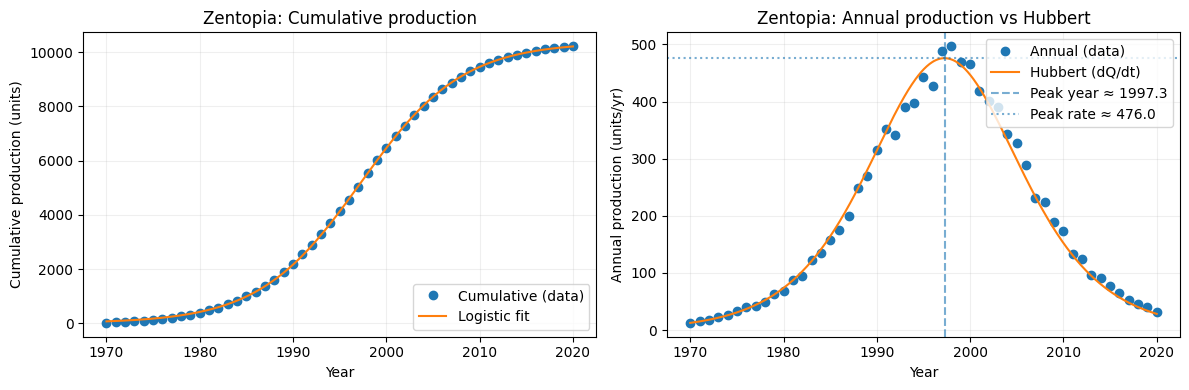

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse t, Q, sub, and fitted pars: Q_inf_hat, k_hat, t0_hat
def hubbert_annual(t, Q_inf, k, t0):
    e = np.exp(-k*(t - t0))
    return (Q_inf * k * e) / (1 + e)**2

# Dense time grid for smooth curves
t_dense = np.linspace(t.min(), t.max(), 500)

Q_fit_dense = hubbert_cumulative(t_dense, Q_inf_hat, k_hat, t0_hat)
P_fit_dense = hubbert_annual(t_dense, Q_inf_hat, k_hat, t0_hat)

# Annual data from dataframe
P_data = sub["Production"].values
years = sub["Year"].values.astype(float)

# Peak annotations
t_peak = t0_hat
P_peak = (Q_inf_hat * k_hat) / 4.0

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=False)

# ---- (A) Cumulative: data vs fit ----
ax[0].plot(t, Q, "o", label="Cumulative (data)")
ax[0].plot(t_dense, Q_fit_dense, "-", label="Logistic fit")
ax[0].set_title(f"{country_choice}: Cumulative production")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Cumulative production (units)")
ax[0].legend(loc="lower right")
ax[0].grid(True, alpha=0.2)

# ---- (B) Annual: data vs d(Logistic)/dt ----
ax[1].plot(years, P_data, "o", label="Annual (data)")
ax[1].plot(t_dense, P_fit_dense, "-", label="Hubbert (dQ/dt)")
ax[1].axvline(t_peak, ls="--", alpha=0.6, label=f"Peak year ≈ {t_peak:.1f}")
ax[1].axhline(P_peak, ls=":", alpha=0.6, label=f"Peak rate ≈ {P_peak:.1f}")
ax[1].set_title(f"{country_choice}: Annual production vs Hubbert")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Annual production (units/yr)")
ax[1].legend(loc="upper right")
ax[1].grid(True, alpha=0.2)

# Tidy ticks
for a in ax:
    a.tick_params(axis="x", rotation=0)
    # If your years are dense, show every 5th tick:
    # a.set_xticks(range(int(years.min()), int(years.max())+1, 5))

plt.tight_layout()
plt.show()


### Interpreting the parameters

- **URR \(Q_{\infty}\)**: total ultimately recoverable amount (same base unit as your cumulative curve).  
- **Growth rate \(k\)**: controls how steeply production rises and falls.  
- **Midpoint \(t_0\)**: the year when cumulative reaches \(Q_{\infty}/2\); the **annual** curve peaks at (approximately) this year.  
- **Peak annual rate**: \(P_{\max} = Q_{\infty} k / 4\).

If the annual data and the derivative of the fitted cumulative **line up reasonably**, your resource history is “Hubbert-like.” If not, discuss why (technology shocks, policy, geopolitics, pricing cycles, new field discoveries, disruptions).


In [25]:
# (Optional) Save figures for slides
plt.savefig("zentopia_cumulative_and_annual_fit.png", dpi=200, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

### Wrap-up / What to report (add to your 4–6 slides)

1. **Data & Units:** State your units clearly (annual and cumulative).  
2. **Top 5 producers:** One figure or table for a chosen year.  
3. **Trends:** A time-series plot for your country set (or world total).  
4. **Hubbert fit (one country or world):**
   - Show cumulative data vs. logistic fit (with \(R^2\)).  
   - Show annual data vs. d(Logistic)/dt, with peak annotations.  
   - Report fitted parameters \(Q_{\infty}\), \(k\), \(t_0\.  
5. **Geologic context:** Basin/deposit type, key formations/ages for top producers.  
6. **Limitations:** Note data gaps, unit conversions, and non-Hubbert influences.

**Tip:** If a fit fails or looks poor, that’s still valuable—explain *why* and what that says about geology, technology, or policy.
